In [31]:
# Import all necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import sklearn.tree as tree

In [2]:
# import data
data = pd.read_csv("market_analysis.csv")

data.head()

,Total number of Zoom webinar registrations,Total number of Zoom webinars attended,Average Zoom webinar attendance duration,Number of Zoom webinar durations >50%,Survey response: Speak with ProfDev?,State/Region,Country/Region,Opportunity
0,8.0,6.0,55%,5.0,No,Massachusetts,United States,0
1,4.0,1.0,50%,1.0,NaN,Virginia,United States,0
2,7.0,3.0,57%,1.0,NaN,NaN,NaN,0
3,27.0,15.0,45%,8.0,No,California,United States,0
4,5.0,4.0,59%,3.0,No,Texas,United States,0


In [3]:
# Get information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Total number of Zoom webinar registrations  1679 non-null   float64
 1   Total number of Zoom webinars attended      1679 non-null   float64
 2   Average Zoom webinar attendance duration    1679 non-null   object 
 3   Number of Zoom webinar durations >50%       1547 non-null   float64
 4   Survey response: Speak with ProfDev?        782 non-null    object 
 5   State/Region                                1331 non-null   object 
 6   Country/Region                              1344 non-null   object 
 7   Opportunity                                 1691 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 105.8+ KB


In [4]:
# Rename the columns (easier for data processing)
data = data.rename(columns = {'Total number of Zoom webinar registrations': 'registrations', 'Total number of Zoom webinars attended': 'attended', 'Average Zoom webinar attendance duration': 'attendance_duration', 'Number of Zoom webinar durations >50%': 'duration_>50', 'Survey response: Speak with ProfDev?': 'survey'})
data.head()

,registrations,attended,attendance_duration,duration_>50,survey,State/Region,Country/Region,Opportunity
0,8.0,6.0,55%,5.0,No,Massachusetts,United States,0
1,4.0,1.0,50%,1.0,NaN,Virginia,United States,0
2,7.0,3.0,57%,1.0,NaN,NaN,NaN,0
3,27.0,15.0,45%,8.0,No,California,United States,0
4,5.0,4.0,59%,3.0,No,Texas,United States,0


In [5]:
# Change object duration column to float - had to do before filling null values with 0 to avoid a value error
data['attendance_duration'] = data['attendance_duration'].str.rstrip('%').astype(float) / 100

In [6]:
# Need to handle all the null values in the data
float_cols = ['registrations', 'attended', 'attendance_duration', 'duration_>50']
data[float_cols] = data[float_cols].fillna(0)

# Fill survey data with "No"
data['survey'] = data['survey'].fillna('No')

data['State/Region'] = data['State/Region'].fillna('Unknown')
data['Country/Region'] = data['Country/Region'].fillna('Unknown')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   registrations        1691 non-null   float64
 1   attended             1691 non-null   float64
 2   attendance_duration  1691 non-null   float64
 3   duration_>50         1691 non-null   float64
 4   survey               1691 non-null   object 
 5   State/Region         1691 non-null   object 
 6   Country/Region       1691 non-null   object 
 7   Opportunity          1691 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 105.8+ KB


In [7]:
# Make target column type object and variable columns type int
data['Opportunity'] = data['Opportunity'].replace({0:'no', 1:'yes'})
data['survey'] = data['survey'].replace({'No': 0, 'Yes': 1}).infer_objects(copy=False)
data.head()

/var/folders/80/q5zbz2x55cv8zcxjj9h4bvv80000gn/T/ipykernel_66693/841022046.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['survey'] = data['survey'].replace({'No': 0, 'Yes': 1}).infer_objects(copy=False)


,registrations,attended,attendance_duration,duration_>50,survey,State/Region,Country/Region,Opportunity
0,8.0,6.0,0.55,5.0,0,Massachusetts,United States,no
1,4.0,1.0,0.50,1.0,0,Virginia,United States,no
2,7.0,3.0,0.57,1.0,0,Unknown,Unknown,no
3,27.0,15.0,0.45,8.0,0,California,United States,no
4,5.0,4.0,0.59,3.0,0,Texas,United States,no


In [8]:
# One-Hot encode state and country columns
data = pd.get_dummies(data, columns = ['State/Region', 'Country/Region'], drop_first=True)
data.head()

,registrations,attended,attendance_duration,duration_>50,survey,Opportunity,State/Region_Alaska,State/Region_Arizona,State/Region_Arkansas,State/Region_California,State/Region_Colorado,State/Region_Connecticut,State/Region_Delaware,State/Region_District of Columbia,State/Region_Florida,State/Region_Georgia,State/Region_Hawaii,State/Region_Idaho,State/Region_Illinois,State/Region_Indiana,State/Region_Iowa,State/Region_Kansas,State/Region_Kentucky,State/Region_Louisiana,State/Region_Maine,State/Region_Maryland,State/Region_Massachusetts,State/Region_Michigan,State/Region_Minnesota,State/Region_Mississippi,State/Region_Missouri,State/Region_Montana,State/Region_Nebraska,State/Region_Nevada,State/Region_New Hampshire,State/Region_New Jersey,State/Region_New Mexico,State/Region_New York,State/Region_North Carolina,State/Region_North Dakota,State/Region_Ohio,State/Region_Oklahoma,State/Region_Oregon,State/Region_Pennsylvania,State/Region_Puerto Rico,State/Region_Rhode Island,State/Region_South Carolina,State/Region_South Dakota,State/Region_Tennessee,State/Region_Texas,State/Region_Unknown,State/Region_Utah,State/Region_Vermont,State/Region_Virginia,State/Region_Washington,State/Region_West Virginia,State/Region_Wisconsin,State/Region_Wyoming,Country/Region_Algeria,Country/Region_American Samoa,Country/Region_Armenia,Country/Region_Australia,Country/Region_Bahrain,Country/Region_Bermuda,Country/Region_Canada,Country/Region_El Salvador,Country/Region_Georgia,Country/Region_Guyana,Country/Region_India,Country/Region_Jamaica,Country/Region_Mexico,Country/Region_New Zealand,Country/Region_Pakistan,Country/Region_Paraguay,Country/Region_Philippines,Country/Region_Sri Lanka,Country/Region_Thailand,Country/Region_United Arab Emirates,Country/Region_United States,Country/Region_Unknown
0,8.0,6.0,0.55,5.0,0,no,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,4.0,1.0,0.50,1.0,0,no,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,7.0,3.0,0.57,1.0,0,no,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,27.0,15.0,0.45,8.0,0,no,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,5.0,4.0,0.59,3.0,0,no,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Fa

In [9]:
# Convert only dummy columns to 0/1
dummy = data.columns[data.columns.str.contains('State/Region_|Country/Region_')]
data[dummy] = data[dummy].astype(int)
data.head()

,registrations,attended,attendance_duration,duration_>50,survey,Opportunity,State/Region_Alaska,State/Region_Arizona,State/Region_Arkansas,State/Region_California,State/Region_Colorado,State/Region_Connecticut,State/Region_Delaware,State/Region_District of Columbia,State/Region_Florida,State/Region_Georgia,State/Region_Hawaii,State/Region_Idaho,State/Region_Illinois,State/Region_Indiana,State/Region_Iowa,State/Region_Kansas,State/Region_Kentucky,State/Region_Louisiana,State/Region_Maine,State/Region_Maryland,State/Region_Massachusetts,State/Region_Michigan,State/Region_Minnesota,State/Region_Mississippi,State/Region_Missouri,State/Region_Montana,State/Region_Nebraska,State/Region_Nevada,State/Region_New Hampshire,State/Region_New Jersey,State/Region_New Mexico,State/Region_New York,State/Region_North Carolina,State/Region_North Dakota,State/Region_Ohio,State/Region_Oklahoma,State/Region_Oregon,State/Region_Pennsylvania,State/Region_Puerto Rico,State/Region_Rhode Island,State/Region_South Carolina,State/Region_South Dakota,State/Region_Tennessee,State/Region_Texas,State/Region_Unknown,State/Region_Utah,State/Region_Vermont,State/Region_Virginia,State/Region_Washington,State/Region_West Virginia,State/Region_Wisconsin,State/Region_Wyoming,Country/Region_Algeria,Country/Region_American Samoa,Country/Region_Armenia,Country/Region_Australia,Country/Region_Bahrain,Country/Region_Bermuda,Country/Region_Canada,Country/Region_El Salvador,Country/Region_Georgia,Country/Region_Guyana,Country/Region_India,Country/Region_Jamaica,Country/Region_Mexico,Country/Region_New Zealand,Country/Region_Pakistan,Country/Region_Paraguay,Country/Region_Philippines,Country/Region_Sri Lanka,Country/Region_Thailand,Country/Region_United Arab Emirates,Country/Region_United States,Country/Region_Unknown
0,8.0,6.0,0.55,5.0,0,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4.0,1.0,0.50,1.0,0,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,7.0,3.0,0.57,1.0,0,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,27.0,15.0,0.45,8.0,0,no,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5.0,4.0,0.59,3.0,0,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [10]:
# Split data into training and testing
X = data.loc[:, data.columns != 'Opportunity']
y = data['Opportunity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

In [11]:
# Scale the data
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

In [12]:
# Train the model
log_reg = LogisticRegression(C = 100, max_iter = 2000)

log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,100
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [13]:
# Check accuracy
print("Training Accuracy: ", str(100*log_reg.score(X_train_n, y_train)))
print("Test Accuracy: ", str(100*log_reg.score(X_test_n, y_test)))

Training Accuracy:  92.89940828402366
Test Accuracy:  90.94488188976378


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [14]:
# Confustion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report

y_pred = log_reg.predict(X_test_n)

conf = confusion_matrix(y_test, y_pred)
print(conf)

c_report = classification_report(y_test, y_pred)
print(c_report)

[[462   7]
 [ 39   0]]
              precision    recall  f1-score   support

          no       0.92      0.99      0.95       469
         yes       0.00      0.00      0.00        39

    accuracy                           0.91       508
   macro avg       0.46      0.49      0.48       508
weighted avg       0.85      0.91      0.88       508



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [15]:
# Determine which features have most influence on the likelihood of an opportunity
X_coef = X.drop(columns = dummy)

coefficients = pd.Series(log_reg.coef_[0], index=X.columns)

# Sort by absolute value to find the most influential features
coefficients_sorted = coefficients.sort_values(key=abs, ascending=False)

# Display the top features with direction
print("Top features by influence on booking a demo:")
coefficients_sorted.head()

Top features by influence on booking a demo:


Country/Region_Guyana       6.853448
Country/Region_Georgia      5.653055
State/Region_Puerto Rico    5.345588
State/Region_Minnesota     -3.685604
State/Region_Indiana       -3.377512
dtype: float64

Above we can see that after one hot encoding, the locations for each datapoint have very large weights. Because of this, we are going to look at a model that doesn't look at location data.

In [16]:
# try logistic regression without the location specific columns
X_train_c, X_test_c, y_train, y_test = train_test_split(X_coef, y, test_size = 0.3, random_state=100)

lr_coef = LogisticRegression(C = 100, tol = 0.0001, max_iter = 2000)

lr_coef.fit(X_train_c, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,100
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [17]:
X_coef.head()

,registrations,attended,attendance_duration,duration_>50,survey
0,8.0,6.0,0.55,5.0,0
1,4.0,1.0,0.50,1.0,0
2,7.0,3.0,0.57,1.0,0
3,27.0,15.0,0.45,8.0,0
4,5.0,4.0,0.59,3.0,0


In [18]:
# Check accuracy
print("Training Accuracy: ", str(100*lr_coef.score(X_train_c, y_train)))
print("Test Accuracy: ", str(100*lr_coef.score(X_test_c, y_test)))

Training Accuracy:  92.6458157227388
Test Accuracy:  92.32283464566929


In [ ]:
# Confustion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report

y_pred_c = lr_coef.predict(X_test_c)

conf_c = confusion_matrix(y_test, y_pred_c)
print(conf_c)

c_report_c = classification_report(y_test, y_pred_c)
print(c_report_c)

[[462   7]
 [ 39   0]]
              precision    recall  f1-score   support

          no       0.92      1.00      0.96       469
         yes       0.00      0.00      0.00        39

    accuracy                           0.92       508
   macro avg       0.46      0.50      0.48       508
weighted avg       0.85      0.92      0.89       508



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

In [21]:
# Determine which features have most influence on the likelihood of an opportunity - not focusing on location
coef = pd.Series(lr_coef.coef_[0], index=X_coef.columns)

# Sort by absolute value to find the most influential features
coefficients_sorted_c = coef.sort_values(key=abs, ascending=False)

# Display the top features with direction
print("Top features by influence on booking a demo:")
print(coefficients_sorted_c)

Top features by influence on booking a demo:
survey                 0.811262
attendance_duration    0.098118
duration_>50          -0.089055
registrations         -0.030616
attended               0.015566
dtype: float64


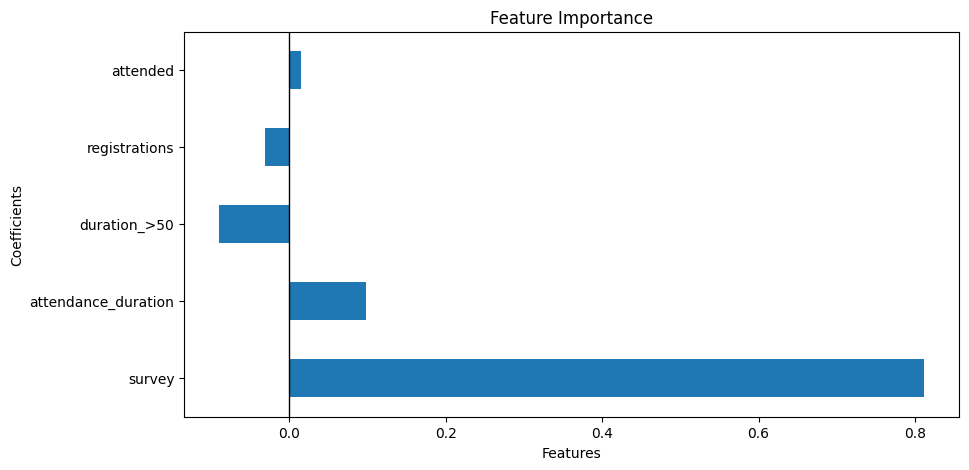

In [25]:
plt.figure(figsize = (10,5))
coefficients_sorted_c.plot(kind='barh')
plt.axvline(0, color='black', linewidth=1)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Feature Importance')
plt.tight_layout
plt.show()

In [28]:
# Now let's train a Decision Tree Classifier to confirm our findings
tree_clf = DecisionTreeClassifier(random_state=100)

# Grid Search to optimize the tree
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

gridSearch = GridSearchCV(tree_clf, param_grid, cv = 5, n_jobs = 1)
initial = gridSearch.fit(X_train_n, y_train)

In [29]:
# Determine best tree
print("Initial Score: ", gridSearch.best_score_)
print("Initial Parameters: ", gridSearch.best_params_)

Initial Score:  0.9264607022813417
Initial Parameters:  {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20}


In [30]:
# Train the best model
best = gridSearch.best_estimator_
best_model = best.fit(X_train_n, y_train)

In [33]:
# Evaluate the Model
best_pred = best_model.predict(X_test_n)

print("Training Accuracy: ", str(100*best.score(X_train_n, y_train)))
print("Test Accuracy: ", str(100*best.score(X_test_n, y_test)))

Training Accuracy:  92.6458157227388
Test Accuracy:  92.32283464566929


In [34]:
# Model Metrics
conf_tree = confusion_matrix(y_test, best_pred)
print(conf_tree)

c_report_tree = classification_report(y_test, best_pred)
print(c_report_tree)

[[469   0]
 [ 39   0]]
              precision    recall  f1-score   support

          no       0.92      1.00      0.96       469
         yes       0.00      0.00      0.00        39

    accuracy                           0.92       508
   macro avg       0.46      0.50      0.48       508
weighted avg       0.85      0.92      0.89       508



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

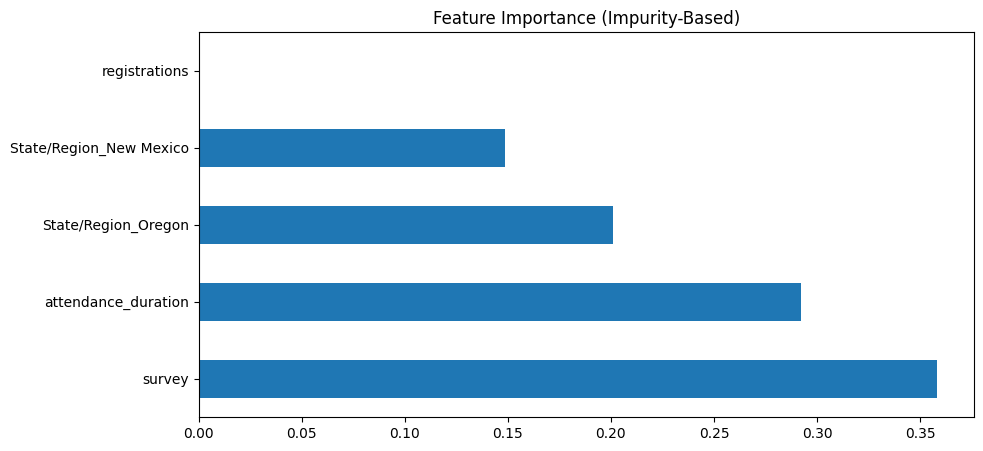

In [42]:
# Feature Importance
feat_imp = pd.Series(best_model.feature_importances_, index=X.columns)
top_5 = feat_imp.sort_values(ascending=False).head()
top_5.plot(kind='barh', figsize=(10,5))
plt.title("Feature Importance (Impurity-Based)")
plt.show()

Even with the locations included in the decision tree, we still find that the survey response is the greatest indicator of a future business opportunity.